# Week 04: In Class Assignment: <br> Singular Value Decomposition (SVD) and Principal Component Analysis (PCA)

### <p style="text-align: right;"> &#9989; Kyle Taft
<p style="text-align: right;"> &#9989; Lucas, Dawit, Jacob

![opt_pic](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*dnvjYsiEhj-NzFf6ZeCETg.jpeg)

## Unsupervised Learning

The goals of unsupervised learning are very different from supervised and reinforcement learning. One goal is called "dimensionality reduction". We will spend an entire week on this when we get to Chapter 8; today we will focus on the underlying linear algebra that is behind some of those methods. The goal is that you have a bit more insight once we get to that part of the course! So, let's get to some linear algebra!

### Part 1. Matrix Decompositions

In the lecture it was mentioned that it is often benefical to write matrices in terms of products of matrices that have selected properties. These had names like eigendecomposition, Cholesky, QR and so on. Today you will become expert on one called SVD, which stands for "Singular Value Decomposition". If by any chance you have worked with the eigendecomposition before, this is the generalization to rectangular matrices; if not, don't worry about it.

In the SVD decomposition some data matrix ${\bf X}$ is written as
$${\bf X} = {\bf U}{\bf \Sigma}{\bf V}^T,$$
where
* ${\bf U}$ is a _square_, _unitary_ matrix,
* ${\bf \Sigma}$ is a _rectangular_, _diagonal_ matrix,
* ${\bf V}$ is a _square_, _unitary_ matrix.

This probably seems like a very odd thing to do! Before we get to why this might be interesting and useful, let's be sure we know what all of this means. Answer these questions and discuss them within your group:

&#9989; **Task:** Answer the following questions:

1. What is a "unitary matrix" and what are some of its properties? 
2. What is a "diagonal matrix" and what are some of its properties?
3. What is the name given to the values in the matrix ${\bf \Sigma}$?
4. If the data matrix ${\bf X}$ has a shape $m\times n$, what are the shapes of the other three matrices?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. It is a matrix that its conjugate transpose is equal to its inverse. It is normal and diagonalizable.
2. It is a matrix that has all zeros except for the diagonal. It can be used to show the eigenvalues of a matrix.
3. Singular values
4. U is m x m, Sigma is m x n, V is n x n

### 1.2 Properties of the SVD

As we just saw, the matrix ${\bf \Sigma}$ is diagonal. Let's suppose that we choose to write it as

$$ {\bf \Sigma}  = \begin{bmatrix} \sigma_1 & 0 & 0 & \ldots \\ 0 & \sigma_2 & 0 & \ldots\\ 0 & 0 & \sigma_3 & \ldots \\ \dots \end{bmatrix}.$$

The SVD the values $\sigma_1, \sigma_2, \ldots$ are called the "singular values", which is where SVD gets its name. 

**Hint:** If you are not an expert at markdown and $\LaTeX$ yet and you see something in a notebook you want to use, click in the markdown cell to see how it was coded; for example, if you want to put a matrix into this notebook, you can copy the $\LaTeX$ from the cell above. This can save time figuring out $\LaTeX$ commands you don't know yet.


&#9989; **Task:** Answer the following questions:

1. If the data array ${\bf X}$ has dimensions $m\times n$, how many singular values are there?
2. What happens when you multiply a matrix with a diagonal matrix? We want to break down the SVD: what form does ${\bf \Sigma}{\bf V}^T$ generally have? Give an explicit example using $\LaTeX$ for a $2\times 2$ ${\bf X}$. (In general ${\bf X}$ will not be square, of course, but use something as simple as you can to illustrate your result.) Feel free to use the whiteboards to work this out with your group. 
3. Let's suppose that we (everyone on Earth) agrees that when we perform an SVD that we always order the singular values  in order from largest to smallest, $\sigma_1 > \sigma_2 > \sigma_3 \ldots$. Let us further suppose that many of the singular values are quite small, negligible compared to the first few, allowing us to simply set them to zero. Work out and demonstrate using $\LaTeX$ what the consequences are. That is, what form does ${\bf \Sigma}{\bf V}^T$ have when ${\bf \Sigma}$ is both diagonal and has many zeros along the lower-right portion of the diagonal. 
4. What about the overall form $ {\bf U}{\bf \Sigma}{\bf V}^T$? Think about what we talked about in the first lecture about dimensionality reduction: even if it is vague and still a bit abstract, describe how setting the smallest singular values to zero roughly contains the notion of reducing the dimensionality of the problem. It might help to sketch out the shapes of the matrices on the chalkboards with your group using arbitrary matrices with elements $M_{ij}$. (Hint: you might work out the entire SVD for a $3\times 3$ where there is only one retained singular value $\sigma_1$.) Compare the full data matrix ${\bf X}$ with the one you get when you see most of the singular values to zero. 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 
1. There are n singular values.
2. When you multiple a matrix with a diagonal matrix, you scale the rows of the matrix by the diagonal elements. It will have the rows of sigma by the columns of V.T.
$$ {\bf \Sigma}{\bf V}^T  = \begin{bmatrix} 4 & 0 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 2 & 3 \\ 2 & 5 \end{bmatrix} = \begin{bmatrix} 8 & 12 \\ 6 & 15 \end{bmatrix}$$

3. For every sigma value that is zero, the corresponding row in V.T will be zero.
4. The overall form will be the same but it will not have orthogonal columns. It will have the same number of columns as the number of singular values that are not zero.

In [6]:
import numpy as np
V = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
sig = np.matrix([[2,0,0],[0,1,0],[0,0,0],[0,0,0]])
sig2 = np.matrix([[1,0,0],[0,0.5,0],[0,0.25,0],[0,0,0]])
# 4x4
U = np.matrix([[1,2,2,4],[6,7,3,2],[3,4,1,2],[4,6,7,2]])

print(U*sig*V.T)
print(U*sig2*V.T)

[[  6  18  30]
 [ 26  83 140]
 [ 14  44  74]
 [ 20  62 104]]
[[ 4.   11.5  19.  ]
 [14.5  45.25 76.  ]
 [ 7.5  23.25 39.  ]
 [13.5  39.75 66.  ]]


### 1.3 Let's code.

&#9989; **Task:**  You won't be surprised to learn that SVD is built directly into SciPy's `linalg` library. Look up, using the internet, how to use the `svd` library and complete the code below, adding comments to the most important lines and answering the questions in the comments.


Notice that there are several lines commented out. Think of the matrix that is being made as the data in 2D. Try all of the lines, one at a time, and understand what structure the data has by looking at the plots. For each case, discuss in the markdown cell below what ${\bf \Sigma}$ is telling you about the structure of the data. 

The SVD is:

 U =  [[-6.97304142e-01 -1.17332576e-01  7.07106781e-01]
 [ 6.97304142e-01  1.17332576e-01  7.07106781e-01]
 [-1.65933321e-01  9.86136975e-01  1.11022302e-16]]

 S =  [0.77089418 0.27517659]

 V_T =  [[ 0.90453937 -0.42639011]
 [ 0.42639011  0.90453937]] 



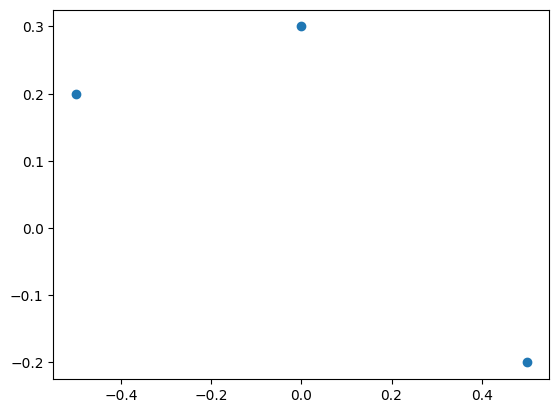

In [23]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# Try each of these to see what different data "shapes" have on the SVD.
### What pattern do you see in S as the data takes different "shapes"? 
x = np.array([[0, 0.5], [0.0, -0.5]]) # [sqrt(2)/2,0]
# x = np.array([[0.5, 0.0], [-0.5, -0.0]])# [sqrt(2)/2,0]
# x = np.array([[-0.5, -0.5], [0.5, 0.5]])# [1,0]
x = np.array([[-0.5, 0.2], [0.5, -0.2], [0.0, 0.3]]) #[0.77089418 0.27517659]
#x = np.random.randn(50, 2) # [8.23016809 6.85768436]

### What does this do!? Are there other options? 
U, S, V_T = linalg.svd(x)

print('The SVD is:')
print('\n U = ', U)
print('\n S = ', S)
print( '\n V_T = ', V_T, '\n')

plt.scatter(x[:,0], x[:,1])

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 
1. The singular values are the diagonal elements of sigma. It returns the singular values in descending order. This tell us the importance of each column. For the first two examples we have redundency so we get 0 values. As we increase complexity/uniqueness the values increase.

### 1.4 Image compression

![beaumont_tower](https://en.wikipedia.org/wiki/Beaumont_Tower#/media/File:Beaumont_Tower_South_Side.jpg)

Let's now apply SVD to image compression. The code below loads an image, makes a black and white version of it, and plots both versions. The title of each plot shows the size of the data. Note how the color image has three dimensions, that is because there are three color channels: R, G ,B. SVD works on matrices so we need to reduce the dimensionality by taking the mean of three channels and make the black and white version of the colored image. 

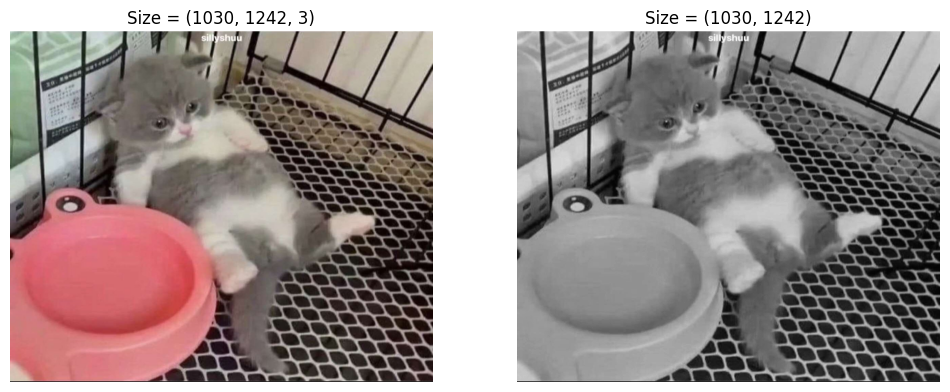

In [25]:
from matplotlib.image import imread

color_img = imread("guh.JPG") # Choose an image of your choice. 
# Make a black and white version
bnw_img = np.mean(color_img, -1)

fig, ax = plt.subplots(1, 2, figsize = (12, 7))
img = ax[0].imshow(color_img) # Note how imshow knows that there are three color channels
img = ax[1].imshow(bnw_img)
img.set_cmap('gray')

ax[0].set_title(f'Size = {np.shape(color_img)}')
ax[1].set_title(f'Size = {np.shape(bnw_img)}')

for a in ax:
    a.axis('off')

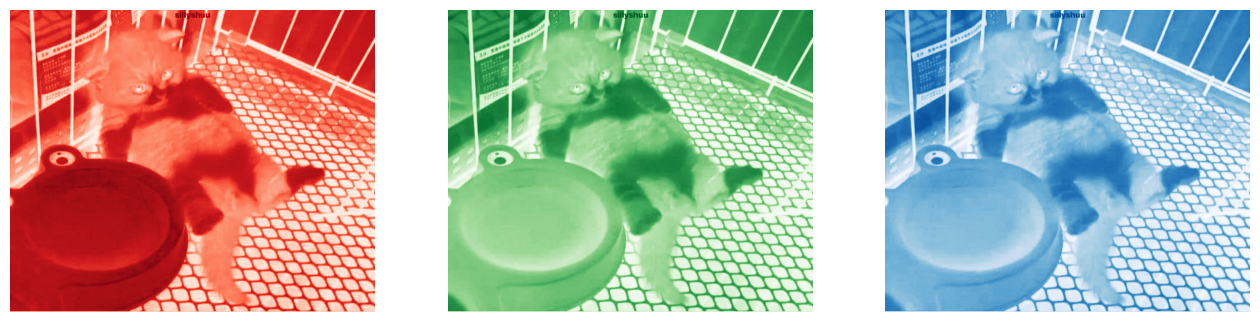

In [26]:
# Extra code for showing each color channel 
# Make a plot for each color channel

fig, ax = plt.subplots(1,3, figsize= (16, 6))

img = ax[0].imshow(color_img[:,:,0])
img.set_cmap('Reds')

img = ax[1].imshow(color_img[:,:,1])
img.set_cmap('Greens')

img = ax[2].imshow(color_img[:,:,2])
img.set_cmap('Blues')

for a in ax:
    a.axis('off')


&#9989; **Task:** Your task is to use SVD to make three (or more) images by keeping only a subset of the singular values. The code below makes a 2x2 grid where you can put your plots. You need only calculate the SVD of the black and white image, reconstruct the image, and plot it using `imshow`. You also need to calculate the reduction in size that you would get if you were to store only the reduced SVD matrices instead of the whole original matrix. 

In [29]:
bnw_img.shape

(1030, 1242)

1279260

(1030, 1242)
(1030, 1242)
(1030, 1242)


Text(0.5, 1.0, 'Original size (1030, 1242)')

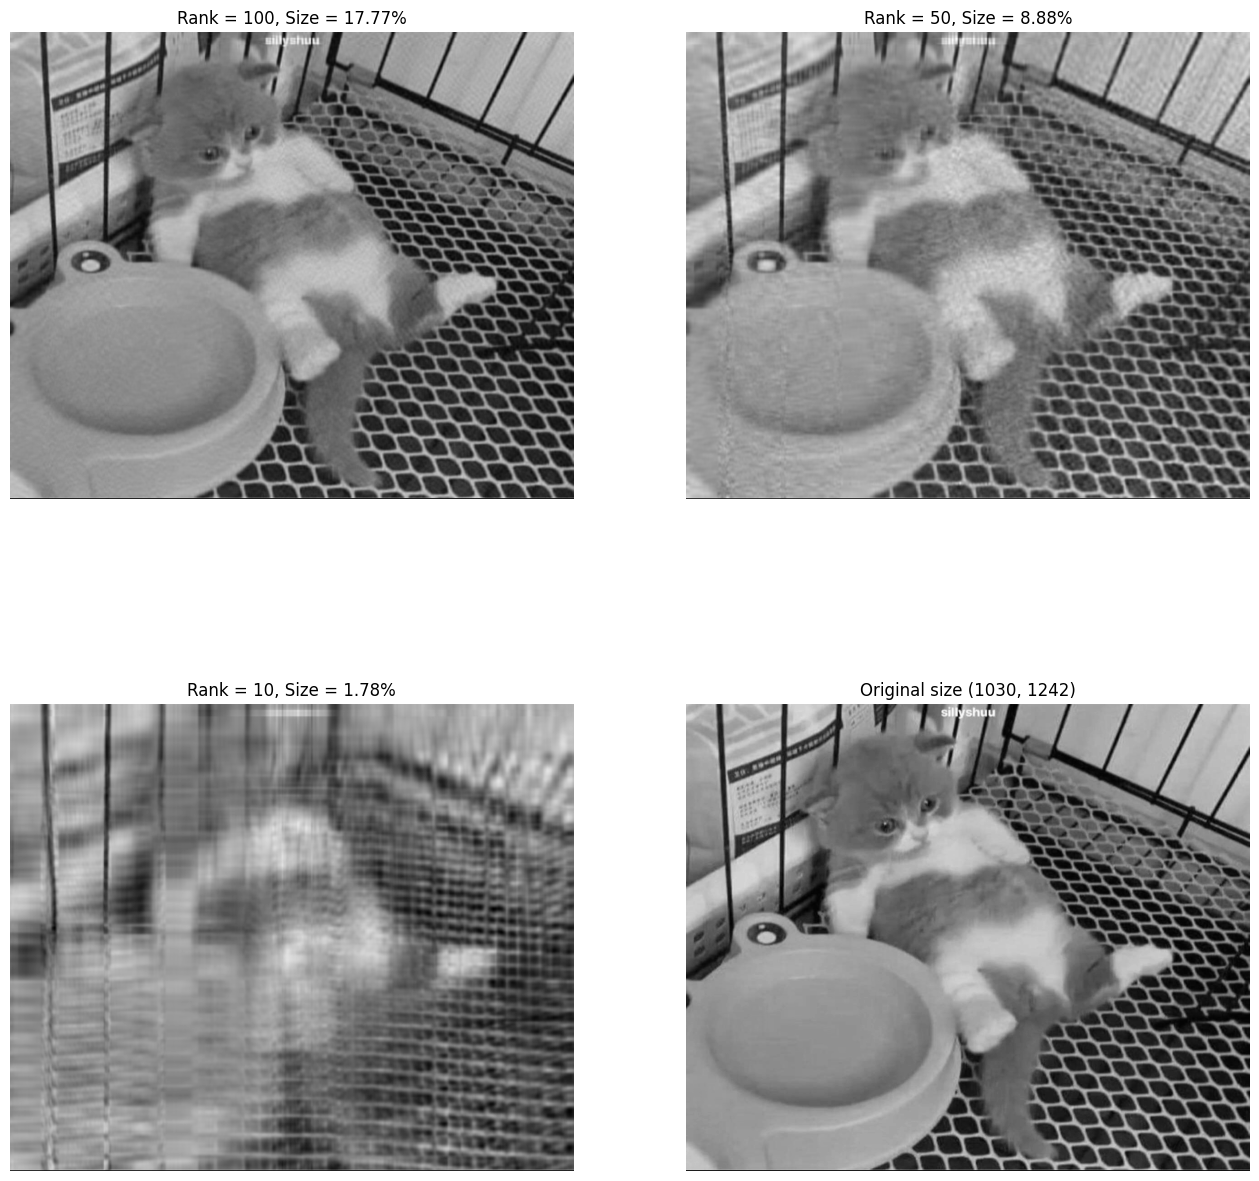

In [39]:
# 
fig, axes = plt.subplots(2,2, figsize = (16, 16))
ax = axes.flatten()

for i, r in enumerate([100, 50, 10]): # choose the maximum number of singular values for reconstruction. 
    # Construct approximate image here
    U, S, V_T = linalg.svd(bnw_img)
  
    img = ax[i].imshow(U[:,:r] @ np.diag(S[:r]) @ V_T[:r, :])
    img.set_cmap('gray')
    ax[i].axis('off')
    ax[i].set_title(f"Rank = {r}, Size = {(U[:,:r].size + S[:r].size + V_T[:r, :].size)/(bnw_img.size) * 100 :.2f}%" )

# Plot the original bnw image for comparison
img = ax[3].imshow(bnw_img)
img.set_cmap('gray')
ax[3].axis('off')
ax[3].set_title(f"Original size {np.shape(bnw_img)}" )

## Part 2. Principal Component Analysis

As mentioned above we will use the tricks of linear algebra later in the course to perform dimensionality reduction, especially in Chapter 8. One ML algorithm we will encounter there is principal component analysis (PCA), which is very commonly used to reduce the dimensionality of a dataset either to visualize it or to prepare the data before it enters into another ML algorithm. Since we just built our intuition on lowering the dimensionality with SVD and we already know how to grab datasets and use `sklearn`, let's see what PCA does. Later we will make the connections between SVD and PCA stronger; the connection might still be slightly abstract at this point, but we will get there soon! 

First, let's grab a dataset - the iris dataset. The iris dataset is four dimensional, making it impossible to directly visualize except through a very awkward approach (something like the Seaborn `pairplot`). Let's see if PCA can help!

Look through this code and discuss anything you don't understand with your group.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['class'] = data.target
wine.head()

### Preprocessing Data Before ML
One of the important steps in ML is scaling the data. This is extremely important in ML because you can make one of the features totally swamp the other features simply by mulitplying its values by a large number (which could happen if, for example, you switched to different units, such as nanometers). Not surprising, this is so standard in ML that it is built into `sklearn` and is even called "standard":

In [ ]:
missing_values = wine.isnull().sum()
print(missing_values)

In [ ]:
# Extract numerical features
X = wine.drop(columns=['class'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


&#9989; **Task:** What did `StandardScaler` do to the data? Write down the math in the cell below

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 


Discuss the code below and its output within your group. Open a new markdown cell below and answer the questions. 

In [ ]:
# Q1. What does this do?
pca = PCA(n_components=2) 
# Q2. What does this do? What must the structure of x be?
principalComponents = pca.fit_transform(X_scaled)

# Note that a lot of the code is simply managing/visualizing the data, not
# doing the ML!
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, wine[['class']]], axis=1)

plt.figure(figsize=(8,6))
classes = list(data.target_names)
colors = ['c', 'm', 'y']

for cls, color in zip(classes, colors):
    indicesToKeep = finalDf['class'] == classes.index(cls)
    plt.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c=color, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA for Wine Dataset')
plt.legend(classes)
plt.grid()
plt.show()


&#9989; **Task:** In the code cell below answer the following questions:

1. What does `pca = PCA(n_components=2)` do ?
2. What does `principalComponents = pca.fit_transform(X_scaled)` do? What must the structure of `x` be?
3. What are your thoughts on what PCA is doing? Does your group feel that PCA might be a good way to visualize high-dimensional data? Can you think of a better way?
4. How does your plot change if you didn't scale the data?
5. If you are familiar with PCA, how are PCA and SVD related? 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

___

## Congratulations, you’re done!

Submit this assignment by uploading it to the course Desire2Learn web page. Go to the “In-class assignments” folder, find the appropriate submission link, and upload it there.

In [ ]:
%%html
<marquee style='width: 40%; color: green;'><b>Congrats, you are done!</b></marquee>

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.